# Compiles all Sources of COP vs. Outdoor Temperature and Plots them

In [3]:
import pandas as pd
import numpy as np

import altair as alt

In [19]:
# File names of the pickled DataFrames containing the data
files = (
    'temp_cop_manuf_max.pkl',
    'temp_cop_manuf_varying.pkl'
)
df = None
for fn_pkl in files:
    if df is None:
        df = pd.read_pickle(fn_pkl)
    else:
        df = pd.concat([df, pd.read_pickle(fn_pkl)])
df

,temperature,cop,source,field_study
0,5.0,2.103426,"Manuf Spec, Max Load",False
1,17.0,2.384794,"Manuf Spec, Max Load",False
2,47.0,3.166171,"Manuf Spec, Max Load",False
0,5.0,2.103426,"Manuf Spec, Varying Load",False
1,17.0,2.678211,"Manuf Spec, Varying Load",False
2,47.0,4.108061,"Manuf Spec, Varying Load",False


In [20]:
# define the theme by returning the dictionary of configurationsa
def larger():
    return {
        'config': {
            'view': {
                'height': 350,
                'width': 525,
            },
            'axis': {
                'labelFontSize': 14, 
                'titleFontSize': 16
            },
            'legend': {
                'labelFontSize': 12, 
                'titleFontSize': 14
            },
        }
    }

# register the custom theme under a chosen name
alt.themes.register('larger', larger)

# enable the newly registered theme
alt.themes.enable('larger')

ThemeRegistry.enable('larger')

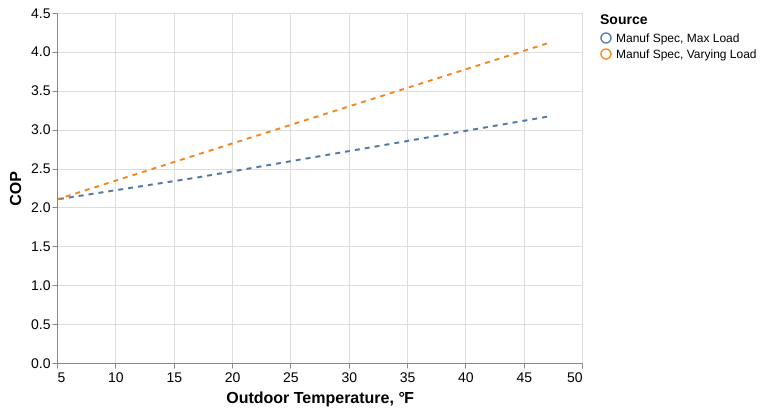

In [21]:
line1 = alt.Chart(df.query('field_study == True')).mark_line().encode(
    x = 'temperature',
    y = 'cop',
    color = 'source:N',
    #opacity = 'Selected:N',
)
line2 = alt.Chart(df.query('field_study == False')).mark_line(strokeDash=[5,5]).encode(
    x = alt.X('temperature', axis=alt.Axis(title='Outdoor Temperature, ℉')),
    y = alt.Y('cop', axis=alt.Axis(title='COP')),
    color = alt.Color('source:N', legend=alt.Legend(title="Source")),
    #opacity = 'Selected:N',
)
line1 + line2